# Exploration of the ERA-int monthly data collection

* [Era-int Database Exploration](#db)
* [Indexes](#indexes)
* [SLP plot](#slpplot)
* [Rasterize a DataFrame containing data and location ](#rasterize)
* [Anomaly Data Collection](#Anomaly)

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid
import pymongo
from pprint import pprint
from datetime import datetime, timedelta, date
import pandas as pd
import gdal as gdl
import matplotlib.mlab as ml 

In [2]:
mongo_host_local = 'mongodb://localhost:27017/'
mg = pymongo.MongoClient(mongo_host_local)

In [3]:
pprint(mg.database_names())

['test', 'ECMWF', 'local', 'GHCN', 'winter_pred']


In [4]:
db = mg.ECMWF
db.collection_names()

['system.indexes',
 'ERAINT_grid',
 'ERAINT_lores_grid',
 'ERAINT_lores_monthly_anom',
 'ERAINT_monthly',
 'ERAINT_lores_monthly']

## ERA-int Database exploration <a id='db'></a>

In [5]:
ERA_vers = 'lores'
if (ERA_vers == 'hires'):
    col_dat = 'ERAINT_monthly'
    col_anom = 'ERAINT_monthly_anom'
    col_grid = 'ERAINT_grid'
    resolution = 0.25
elif (ERA_vers == 'lores'):
    col_dat = 'ERAINT_lores_monthly'
    col_anom = 'ERAINT_lores_monthly_anom'
    col_grid = 'ERAINT_lores_grid'
    resolution = 2.5

In [6]:
con_grid = db[col_grid]
fo = con_grid.find_one()

In [7]:
pprint(fo)

{'_id': ObjectId('5a1882228cb6b815bce38f92'),
 'id_grid': 1,
 'loc': {'coordinates': [-180.0, 90.0], 'type': 'Point'}}


In [8]:
con_grid.count()

10512

In [9]:
con_data = db[col_dat]
fo = con_data.find_one()
pprint(fo)

{'_id': ObjectId('5a1af5c28cb6b8333ed30d63'),
 'al': 0.07,
 'blh': 133.39,
 'ci': 1.0,
 'd2m': 239.53,
 'date': datetime.datetime(1979, 1, 1, 0, 0),
 'hcc': 0.2,
 'id_grid': 1,
 'ie': 0.0,
 'ishf': 11.48,
 'istl1': 242.55,
 'lcc': 0.51,
 'mcc': 0.15,
 'msl': 102793.31,
 'si10': 5.65,
 'skt': 242.63,
 'sp': 102792.57,
 'sst': 271.46,
 'stl1': 242.63,
 't2m': 242.7,
 'u10': 0.95,
 'v10': 0.28,
 'year': 1979,
 'z70': 169747.63}


In [10]:
this_day = datetime(1995,1 ,1)
for doc in con_data.find({'date': this_day}).limit(2):
    pprint(doc)

{'_id': ObjectId('5a1af6f98cb6b83340dd51a3'),
 'al': 0.07,
 'blh': 96.94,
 'ci': 1.0,
 'd2m': 239.33,
 'date': datetime.datetime(1995, 1, 1, 0, 0),
 'hcc': 0.29,
 'id_grid': 1,
 'ie': 0.0,
 'ishf': 10.02,
 'istl1': 242.21,
 'lcc': 0.52,
 'mcc': 0.19,
 'msl': 102342.05,
 'si10': 4.96,
 'skt': 242.22,
 'sp': 102342.02,
 'sst': 271.46,
 'stl1': 242.24,
 't2m': 242.46,
 'u10': -0.5,
 'v10': 2.28,
 'year': 1995,
 'z70': 168316.99}
{'_id': ObjectId('5a1af6f98cb6b83340dd51a4'),
 'al': 0.07,
 'blh': 96.94,
 'ci': 1.0,
 'd2m': 239.33,
 'date': datetime.datetime(1995, 1, 1, 0, 0),
 'hcc': 0.29,
 'id_grid': 2,
 'ie': 0.0,
 'ishf': 10.02,
 'istl1': 242.21,
 'lcc': 0.52,
 'mcc': 0.19,
 'msl': 102342.05,
 'si10': 4.96,
 'skt': 242.22,
 'sp': 102342.02,
 'sst': 271.46,
 'stl1': 242.24,
 't2m': 242.46,
 'u10': -0.39,
 'v10': 2.26,
 'year': 1995,
 'z70': 168316.99}


In [11]:
# How many documents are in the monthly data collection
con_data.count()

4877568

In [12]:
#con_data.drop()

In [13]:
alldays = con_data.distinct(key='date')
alldays

[datetime.datetime(2017, 8, 1, 0, 0),
 datetime.datetime(2017, 7, 1, 0, 0),
 datetime.datetime(2017, 6, 1, 0, 0),
 datetime.datetime(2017, 5, 1, 0, 0),
 datetime.datetime(2017, 4, 1, 0, 0),
 datetime.datetime(2017, 3, 1, 0, 0),
 datetime.datetime(2017, 2, 1, 0, 0),
 datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2016, 12, 1, 0, 0),
 datetime.datetime(2016, 11, 1, 0, 0),
 datetime.datetime(2016, 10, 1, 0, 0),
 datetime.datetime(2016, 9, 1, 0, 0),
 datetime.datetime(2016, 8, 1, 0, 0),
 datetime.datetime(2016, 7, 1, 0, 0),
 datetime.datetime(2016, 6, 1, 0, 0),
 datetime.datetime(2016, 5, 1, 0, 0),
 datetime.datetime(2016, 4, 1, 0, 0),
 datetime.datetime(2016, 3, 1, 0, 0),
 datetime.datetime(2016, 2, 1, 0, 0),
 datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2015, 12, 1, 0, 0),
 datetime.datetime(2015, 11, 1, 0, 0),
 datetime.datetime(2015, 10, 1, 0, 0),
 datetime.datetime(2015, 9, 1, 0, 0),
 datetime.datetime(2015, 8, 1, 0, 0),
 datetime.datetime(2015, 7, 1, 0, 0),
 datet

## Data collection indexes <a id='indexes'></a>

In [15]:
ind = con_grid.index_information()
pprint(ind)

{'_id_': {'key': [('_id', 1)], 'ns': 'ECMWF.ERAINT_lores_grid', 'v': 1},
 'loc_2dsphere_id_grid_1': {'2dsphereIndexVersion': 2,
                            'key': [('loc', '2dsphere'), ('id_grid', 1)],
                            'ns': 'ECMWF.ERAINT_lores_grid',
                            'v': 1}}


In [16]:
con_data.index_information()

{'_id_': {'key': [('_id', 1)], 'ns': 'ECMWF.ERAINT_lores_monthly', 'v': 1},
 'date_-1': {'key': [('date', -1)],
  'ns': 'ECMWF.ERAINT_lores_monthly',
  'v': 1},
 'id_grid_1_date_-1': {'key': [('id_grid', 1), ('date', -1)],
  'ns': 'ECMWF.ERAINT_lores_monthly',
  'v': 1},
 'year_1_id_grid_1': {'key': [('year', 1), ('id_grid', 1)],
  'ns': 'ECMWF.ERAINT_lores_monthly',
  'v': 1}}

# Plot SLP <a id='slpplot'></a>

In [17]:
con_grid.find_one()

{'_id': ObjectId('5a1882228cb6b815bce38f92'),
 'id_grid': 1,
 'loc': {'coordinates': [-180.0, 90.0], 'type': 'Point'}}

- The domain north of 20°N is chosen for EOF decomposition for Z70 hPa and SIC to focus on the extra-tropical variability 
- The area north of 20°S is chosen for SST to also include key regions of tropical SST variability
- Query id_grid encompassed in the domain. Be careful: defining a simple box won't work on the sphere, see [Antimeridian Cutting](https://tools.ietf.org/html/rfc7946#section-3.1.9). In addition, a vertice will follow the shorterst path on the sphere. Hence, we need to define a proper circular path for both latmin and latmax.

In [18]:
this_box = {'lonmin': -180, 'lonmax': 180, 'latmin': 20, 'latmax': 90}
def genCircle(start_lon, stop_lon, lat, decreasing): 
    res = map(lambda x:[int(x), lat],
              sorted(np.arange(start=start_lon, stop=stop_lon+1), reverse=decreasing))
    return list(res)
bb = genCircle(start_lon=this_box['lonmin'], stop_lon=this_box['lonmax'], lat=10, decreasing=True)
circle_north_pos = genCircle(start_lon = this_box['lonmin'], stop_lon = this_box['lonmax'], 
                              lat = this_box['latmax'], decreasing = False)
circle_south_neg = genCircle(start_lon = this_box['lonmin'], stop_lon = this_box['lonmax'], 
                            lat = this_box['latmin'],  decreasing = True)
slp_poly = [[this_box['lonmin'], this_box['latmin']]]
slp_poly.extend(circle_north_pos)
slp_poly.extend(circle_south_neg)
print(slp_poly[0:4])

[[-180, 20], [-180, 90], [-179, 90], [-178, 90]]


In [19]:
#this_polygon =  [[ -100, 60 ], [ -100, 0 ], [ -100, -60 ], [ 100, -60 ], [ 100, 60 ], [ -100, 60 ]]#slp_poly
this_polygon = slp_poly
geo_qry = {"loc": 
           {"$geoWithin": {
               "$geometry": {
                   "type": "Polygon",
                   "coordinates": [this_polygon]
               }
           }}}
con_grid.count(filter = geo_qry)

4104

In [20]:
res = con_grid.find(filter = geo_qry, projection = {"_id":0, "id_grid": 1, "loc": 1})
grid_df = pd.DataFrame(list(res))
grid_ids = grid_df.id_grid.values
grid_ids[:10]

array([4095, 4087, 3945, 4089, 4091, 3947, 3946, 3802, 3803, 3659])

In [21]:
# Query SLP in the data collection for a given day for the grid_ids
this_date = datetime(1988, 12, 1, 0, 0)
res = con_data.find(filter = {
    "date": this_date,
    "id_grid": {"$in": grid_ids.tolist()}},
                       projection = {"_id":0, "id_grid": 1, "msl": 1})
slp_df = pd.DataFrame(list(res))
slp_df.head()

,id_grid,msl
0,1,99672.65
1,2,99672.65
2,3,99672.65
3,4,99672.65
4,5,99672.65


In [22]:
grid_df.head()

,id_grid,loc
0,4095,"{'type': 'Point', 'coordinates': [-25.0, 20.0]}"
1,4087,"{'type': 'Point', 'coordinates': [-45.0, 20.0]}"
2,3945,"{'type': 'Point', 'coordinates': [-40.0, 22.5]}"
3,4089,"{'type': 'Point', 'coordinates': [-40.0, 20.0]}"
4,4091,"{'type': 'Point', 'coordinates': [-35.0, 20.0]}"


In [23]:
# Merge slp_df with grid_df:
slp_dat = pd.merge(left=slp_df, right=grid_df, on = "id_grid")
slp_dat.head()

,id_grid,msl,loc
0,1,99672.65,"{'type': 'Point', 'coordinates': [-180.0, 90.0]}"
1,2,99672.65,"{'type': 'Point', 'coordinates': [-177.5, 90.0]}"
2,3,99672.65,"{'type': 'Point', 'coordinates': [-175.0, 90.0]}"
3,4,99672.65,"{'type': 'Point', 'coordinates': [-172.5, 90.0]}"
4,5,99672.65,"{'type': 'Point', 'coordinates': [-170.0, 90.0]}"


In [24]:
#slp_dat.head()


In [25]:
ras_df = slp_dat.assign(lon = list(map(lambda x: 
                                       x[0]['coordinates'][0],
                                       slp_dat[['loc']].values)),
                        lat = list(map(lambda x: 
                                       x[0]['coordinates'][1],
                                       slp_dat[['loc']].values))
                       ).pipe(lambda x: x[['lon', 'lat', 'msl']])

ras_df.head()

,lon,lat,msl
0,-180.0,90.0,99672.65
1,-177.5,90.0,99672.65
2,-175.0,90.0,99672.65
3,-172.5,90.0,99672.65
4,-170.0,90.0,99672.65


## Rasterize a DataFrame containing data and location <a id='rasterize'></a>
The solution to the rasterization problem was found here: 
https://matplotlib.org/examples/pylab_examples/griddata_demo.html

In [26]:
lons = np.arange(start=-180, stop=180+1, step=resolution)
lats = np.arange(start=-90, stop=90+1, step=resolution)
this_field = ml.griddata(x = ras_df.lon.values,
                 y = ras_df.lat.values,
                 z = ras_df.msl.values,
                 xi = lons,
                 yi = lats,
                 interp='linear')
this_field

masked_array(data =
 [[-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 ..., 
 [100248.96 100266.83 100284.69 ..., 100210.90000000001 100229.86 --]
 [99939.65 99950.09 99960.53 ..., 99914.22000000002 99927.0 --]
 [99672.65 99672.65 99672.65 ..., 99672.65 99672.65 --]],
             mask =
 [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [False False False ..., False False  True]
 [False False False ..., False False  True]
 [False False False ..., False False  True]],
       fill_value = 1e+20)

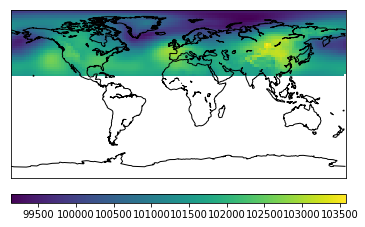

In [27]:
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=-180, urcrnrlon=180, resolution='c', lon_0=0)
cs = m.pcolor(lons, lats, np.squeeze(this_field))
m.drawcoastlines()
cbar = m.colorbar(cs, location='bottom', pad="10%", cmap=plt.cm.RdBu_r)
plt.show()

## Do a nicer plot with re-projections
Using cartopy : http://scitools.org.uk/cartopy/docs/latest/examples/aurora_forecast.html

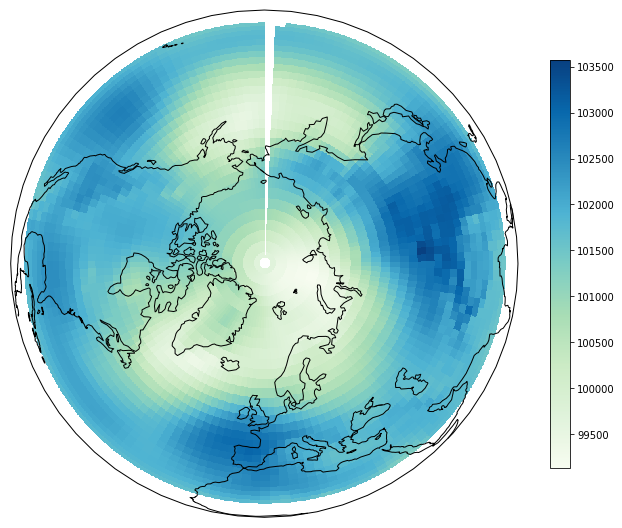

In [28]:
import cartopy.crs as ccrs
this_proj = ccrs.Orthographic(0, 90)
fig = plt.figure(figsize=(25, 25))
ax = plt.subplot(1, 2, 1, projection=this_proj)
ax.coastlines(zorder=3)
img_proj = ccrs.PlateCarree()
img_extent = (-180, 180, -90, 90)
im = ax.imshow(this_field, 
               transform=img_proj,
               extent=img_extent, 
               origin='lower', 
               zorder=2,
               cmap='GnBu')
plt.colorbar(im, orientation='vertical',ticklocation='auto', shrink=0.3)
plt.show()

# Anomaly Data Collection <a id='Anomaly'></a>
This new collection has been created with 'detrending_new_collection.py

In [29]:
con_anom = db[col_anom]
fo = con_anom.find_one()
pprint(fo)

{'_id': ObjectId('5a46876b8cb6b8108790f64a'),
 'al': -2.7755575615628914e-17,
 'blh': 17.16410963120117,
 'ci': 0.00479535363874195,
 'd2m': -1.381832545858515,
 'date': datetime.datetime(1979, 3, 1, 0, 0),
 'hcc': -0.003499210088334481,
 'id_grid': 1,
 'ie': 0.0,
 'ishf': -6.802686632924173,
 'istl1': -0.6554408397386169,
 'lcc': 0.09395961846049472,
 'mcc': 0.1201171896552547,
 'month': 3,
 'msl': -1286.3445712374814,
 'si10': -0.9742091376525144,
 'skt': -0.70064309868485,
 'sp': -1285.586603789896,
 'sst': -1.7053025658242404e-13,
 'stl1': -0.6713863041083243,
 't2m': -1.5088453972467164,
 'u10': -3.921264344805355,
 'v10': 2.6433083071635384,
 'year': 1979,
 'z70': -1312.067142538639}


In [30]:
con_anom.distinct(key='month')

[3, 2, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [31]:
con_anom.index_information()

{'_id_': {'key': [('_id', 1)],
  'ns': 'ECMWF.ERAINT_lores_monthly_anom',
  'v': 1},
 'date_-1': {'key': [('date', -1)],
  'ns': 'ECMWF.ERAINT_lores_monthly_anom',
  'v': 1},
 'id_grid_1_date_-1': {'key': [('id_grid', 1), ('date', -1)],
  'ns': 'ECMWF.ERAINT_lores_monthly_anom',
  'v': 1},
 'year_1_id_grid_1': {'key': [('year', 1), ('id_grid', 1)],
  'ns': 'ECMWF.ERAINT_lores_monthly_anom',
  'v': 1}}

In [32]:
con_anom.count()

4877568

In [33]:
#con_anom.drop()

In [34]:
res = con_anom.find(filter={'id_grid': 1, 'month': 12})
df = pd.DataFrame(list(res))
df.head()

,_id,al,blh,ci,d2m,date,hcc,id_grid,ie,ishf,...,si10,skt,sp,sst,stl1,t2m,u10,v10,year,z70
0,5a46876b8cb6b8108790f784,-2.775558e-17,-168.904821,0.068420,-4.935293,2016-12-01,-0.048662,1,0.0,12.449045,...,-1.305142,-5.815255,615.469474,-1.136868e-13,-5.796348,-4.659398,-1.584809,1.531152,2016,-1497.675093
1,5a46876b8cb6b8108790f783,-2.775558e-17,72.215761,-0.020753,4.252145,2015-12-01,-0.119932,1,0.0,-9.883491,...,-0.089222,5.259531,115.512490,-1.136868e-13,5.238511,3.807698,0.511170,-0.288572,2015,3296.545476
2,5a46876b8cb6b8108790f782,-2.775558e-17,-15.005735,-0.009929,-1.449945,2014-12-01,-0.011198,1,0.0,-1.576730,...,-0.013237,-1.685205,-282.018218,-1.136868e-13,-1.706152,-1.344760,-0.302813,-1.138350,2014,524.664103
3,5a46876b8cb6b8108790f781,-2.775558e-17,-15.867231,0.010896,-5.302035,2013-12-01,0.037536,1,0.0,4.350030,...,0.712749,-4.159941,211.961075,-1.136868e-13,-4.140814,-4.937218,-1.786796,-0.188129,2013,647.052729
4,5a46876b8cb6b8108790f780,-2.775558e-17,-17.178727,0.021720,0.005875,2012-12-01,0.066269,1,0.0,3.106791,...,-0.011265,-0.214677,-718.559633,-1.136868e-13,-0.245477,0.160323,1.489221,0.622093,2012,-1588.748644
